# Will New Drivers Start Driving?

## 2.1 Group Members: Jeremy Schrader

The sample dataset is a cohort of driver signups for Uber from January 2016 and from 3 cities.  The data is from a few months after they signed up to include the result of whether they actually completed their first trip as a driver. It also includes several pieces of background information about the driver and their car.

## 2.2 Problem Formulation

### 2.2.1 Data Problem
The question to be answered is what factors are most predictive of whether an individual who has signed up will start to drive.  Basically, the goal will be(in part 2) to use this information to build a model that weights these factors most strongly so as to most effectively predict whether a new driver, based on their factors, will start to drive.  Whether or not the individual does start to drive is determined by whether they have a date in the "first_completed_date" field, in essence saying that they have driven at least once.

### 2.2.2 Data Population
The data population is all individuals who sign up to be Uber drivers.  The sample is all individuals who signed up in the month of January 2016 from 3 cities.

After looking through the data for the city_name field, I see that only 3 cities are represented in the data. Therefore, the scope of the data is only a subset of Uber's overall driver signups, maybe all signups from those 3 cities.

## 2.3 Data

### 2.3.1 Kaggle account
N/A as my project is not from kaggle(but my kaggle username is jeremyschrader1)

In [31]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 2.3.2 Show First 5 lines
The first 5 lines are shown in the next block.

There is only one data file. The data dictionary is provided below.  The headers are included in the data file.  We can see from the data dictionary that we have different kinds of data:
- data about the driver, e.g. city_id
- data about the signup process, e.g. signup_os
- data about the driver's car, e.g. vehicle_make

The target variable is `first_trip_date`.  Basically, did this person who signed up actually ever start as an uber driver.  The data dictionary is actually wrong with respect to a number of the field names.  This "first-trip-date" variable is actually named `first_completed_date` in the dataset.

```
id: driver_id
city_id: city_id this user signed up in
signup_os: signup device of the user (“android”, “ios”, “website”, “other”)
signup_channel: what channel did the driver sign up from (“offline”, “paid”, “organic”, “referral”)
signup_timestamp: timestamp of account creation; local time in the form ‘YYYY MM DD’
bgc_date: date of background check consent; in the form ‘YYYY MM DD’
vehicle_added_date: date when driver’s vehicle information was uploaded; in the form ‘YYYY MM DD’
first_trip_date: date of the first trip as a driver; in the form ‘YYYY MM DD’
vehicle_make: make of vehicle uploaded (i.e. Honda, Ford, Kia)
vehicle_model: model of vehicle uploaded (i.e. Accord, Prius, 350z)
vehicle_year: year that the car was made; in the form ‘YYYY’
```

In [32]:
with open('./data/ds_challenge_v2_1_data.csv', 'r') as file:
    # Read the first five lines
    for _ in range(5):
        line = file.readline()
        if not line:
            break
        print(line.strip()) 

id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
1,Strark,ios web,Paid,1/2/16,NA,NA,,,NA,NA
2,Strark,windows,Paid,1/21/16,NA,NA,,,NA,NA
3,Wrouver,windows,Organic,1/11/16,1/11/16,NA,,,NA,NA
4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016,2/3/16


### Data Wrangling
Below, I will walk through each field, look at their characteristics and use the results of this exploration to address the following overarching properties that we need to know about our dataset.
- Structure
- Granularity
- Scope
- Temporality
- Faithfulness

In [33]:
df = pd.read_csv('./data/ds_challenge_v2_1_data.csv')
df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


### Initial Notes:
From looking at the overall dataframe: 
- Structure is correct.  Csv import worked correctly and filenames worked.  
  - Multiple column names(city_id -> city_name, first_trip_date -> first_completed_date) are different from the data dictionary
  - Date formats are provided incorrectly in the data dictionary. 

### Data Formatting Step
Change text date fields to datetime

In [34]:
import pandas as pd
df['dt_signup_date'] = pd.to_datetime(df['signup_date'], format="%m/%d/%y")
df['dt_bgc_date'] = pd.to_datetime(df['bgc_date'], format="%m/%d/%y")
df['dt_vehicle_added_date'] = pd.to_datetime(df['vehicle_added_date'], format="%m/%d/%y")
df['dt_first_completed_date'] = pd.to_datetime(df['first_completed_date'], format="%m/%d/%y")
df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,dt_signup_date,dt_bgc_date,dt_vehicle_added_date,dt_first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02,NaT,NaT,NaT
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-21,NaT,NaT,NaT
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN,2016-01-11,2016-01-11,NaT,NaT
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16,2016-01-29,2016-02-03,2016-02-03,2016-02-03
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN,2016-01-10,2016-01-25,2016-01-26,NaT


In [101]:
print(df['id'].value_counts().max())

1


## Notes: id
From the block above, we can see that there are no duplicates of the id field.  The data dictionary says that this field refers to the `driver_id`. Since this is unduplicated, it indicates that the "Granularity" of our dataset is at the level of the individual signup.


In [35]:
max, min = df['dt_signup_date'].max(), df['dt_signup_date'].min()
print(min, max)

2016-01-01 00:00:00 2016-01-30 00:00:00


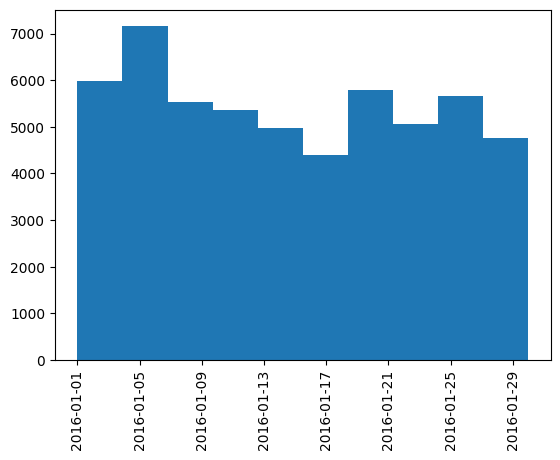

In [36]:
plt.hist(x=df['dt_signup_date'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()

### Initial Notes on Scope and Temporality: signup_date
From the distribution of the `signup_date`, `dt_signup_date` field, we can learn about "Scope" and "Temporality" of the dataset.
- The data is for each day of january 2016(except jan 31).  And, it is essentially regularly distributed across these days.  Therefore, the time of the data is as expected.  The scope of the data is partially based on the time.  There are 54681 rows.  I looked up an estimate for number of people who signed up to drive with uber and did not find anything.  From a look at the city_name field, I see that only 3 cities are represented in the data. Therefore, the scope of the data is only a subset of Uber's overall driver signups, maybe all from those 3 cities.  This "scope" is different than I had understood it to be when first looking at the dataset.  I had thought it was all Uber signups.

### Process Notes: 
I will go through each variable, one-by-one and explore what it should be, what it actually is, and how this informs our understanding of the 5 properties of the dataset.

In [38]:
# View a list of variables and a count of their non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       54681 non-null  int64         
 1   city_name                54681 non-null  object        
 2   signup_os                47824 non-null  object        
 3   signup_channel           54681 non-null  object        
 4   signup_date              54681 non-null  object        
 5   bgc_date                 32896 non-null  object        
 6   vehicle_added_date       13134 non-null  object        
 7   vehicle_make             13223 non-null  object        
 8   vehicle_model            13223 non-null  object        
 9   vehicle_year             13223 non-null  float64       
 10  first_completed_date     6137 non-null   object        
 11  dt_signup_date           54681 non-null  datetime64[ns]
 12  dt_bgc_date              32896 n

In [39]:
# city_name
df['city_name'].value_counts()

city_name
Strark     29557
Berton     20117
Wrouver     5007
Name: count, dtype: int64

### Notes: signup_os
From the breakdown of the city_name field, I can see that the scope of the data is not "All" of uber sign-ups but only those for a few cities.  I'll adjust my statements on the data scope above.

Otherwise, city_name field looks OK.

In [40]:
df['signup_os'].value_counts()

signup_os
ios web        16632
android web    14944
windows         6776
mac             5824
other           3648
Name: count, dtype: int64

### Notes: signup_os
The signup_os field looks reasonable.  

7000 missing values.  Because this is a nominal categorical variable, we can probably handle these by adding another category called 'missing'.

In [41]:
df['signup_channel'].value_counts()

signup_channel
Paid        23938
Referral    17316
Organic     13427
Name: count, dtype: int64

### Notes: signup_channel
This looks reasonable.  I don't know exactly what they stand for, e.g. 'Paid' or 'Organic'.  Also, there is one category, 'offline', that doesn't exist in the data

No missing values.

### Notes: signup_date
I've looked at signup_date already and determined that all dates fall within the expected month and that they are relatively evenly distributed. Therefore, the "Temporality" of this field makes sense.  Further, this is the key field for determining both the "Temporality" and "Scope" of the

No missing values.  This makes sense because the data was pulled(cohort is defined) based on this date.

In [42]:
df['dt_bgc_date'].value_counts()


dt_bgc_date
2016-01-29    1125
2016-01-28    1103
2016-01-30    1071
2016-01-27    1071
2016-01-22    1028
              ... 
2016-03-15       2
2016-03-12       2
2016-03-13       2
2016-03-25       1
2016-03-10       1
Name: count, Length: 74, dtype: int64

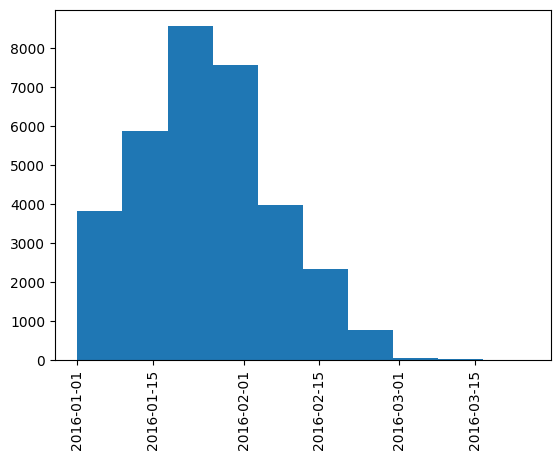

In [43]:
plt.hist(x=df['dt_bgc_date'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()

### Notes: bgc_date
The first thing I did with this field was transform it into a datetime field- dt_bgc_date.  The dates look reasonable.  All dates are after the 1/2016, the initial signup date. Therefore, the "Temporality" of this field makes sense.


By itself, this date isn't very helpful.  However, I think that we can get 2 helpful pieces of information out of this field:
1. The amount of time after signup when this was completed
2. A boolean indicating whether it was completed or not.  

I'll add these in the next block.

~22,000 missing values.  About 40%.

In [44]:
# At this point I'm going to create my final dataframe with all of my engineered variables, those that I 
# will be keeping for analysis
df_f = df.drop(columns=['signup_date', 'bgc_date', 'vehicle_added_date', 'first_completed_date'])


In [45]:
df_f['days_to_bgc'] = (df_f['dt_bgc_date'] - df_f['dt_signup_date']).dt.days
df_f['obtained_bgc'] = False
df_f.loc[~df_f['dt_bgc_date'].isna(), 'obtained_bgc'] = True

(array([1.6563e+04, 6.8750e+03, 4.1400e+03, 2.6050e+03, 1.5250e+03,
        7.1600e+02, 3.5100e+02, 1.0700e+02, 1.3000e+01, 1.0000e+00]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

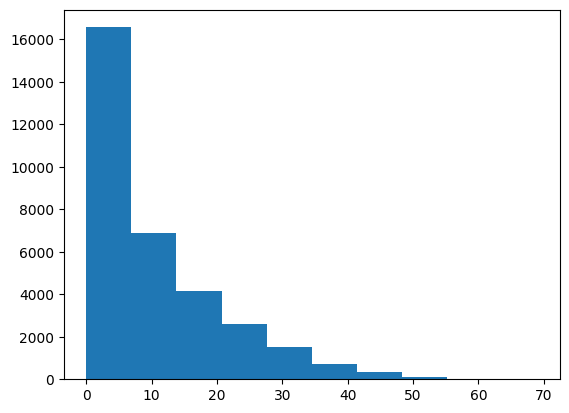

In [46]:
plt.hist(x=df_f['days_to_bgc'])

### Notes: vehicle_added_date
The first thing I did with this field was transform it into a datetime field- dt_vehicle_added_date.  The dates again look reasonable.  All dates are after the 1/2016, the initial signup date.  Therefore, the "Temporality" of this field makes sense.

By itself, like the `bgc_date`, this date isn't very helpful.  However, I think that we can again get 2 helpful pieces of information out of this field:
1. The amount of time after signup when this was completed
2. A boolean indicating whether it was completed or not. 


I'll add these in the next block.

~40,000 missing values.  About 80%.

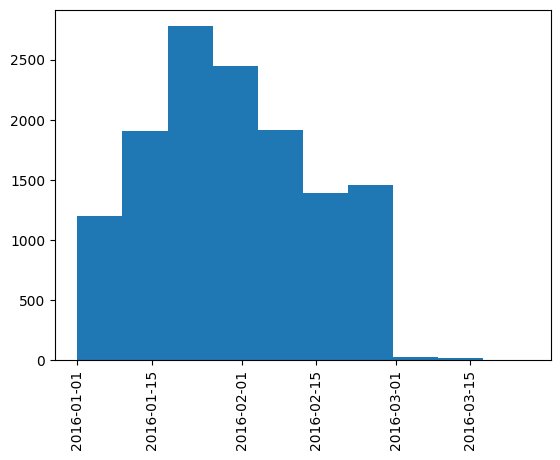

In [47]:
plt.hist(x=df['dt_vehicle_added_date'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [48]:
df_f['days_to_vehicle_added'] = (df_f['dt_vehicle_added_date'] - df_f['dt_signup_date']).dt.days
df_f['added_vehicle'] = False
df_f.loc[~df_f['dt_vehicle_added_date'].isna(), 'added_vehicle'] = True

(array([2578., 3926., 2196., 1377., 1301.,  887.,  549.,  286.,   27.,
           7.]),
 array([-5. ,  2.7, 10.4, 18.1, 25.8, 33.5, 41.2, 48.9, 56.6, 64.3, 72. ]),
 <BarContainer object of 10 artists>)

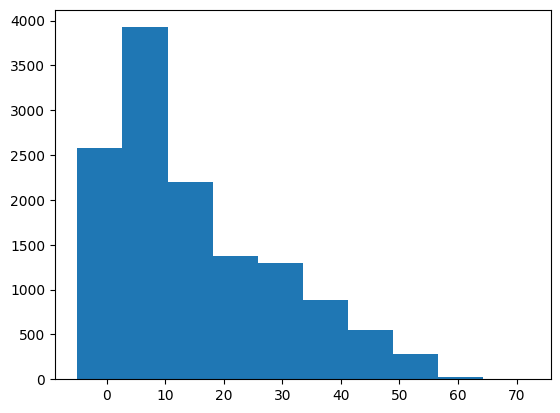

In [49]:
plt.hist(x=df_f['days_to_vehicle_added'])

### Notes: vehicle_make

The value_counts shows that these values look reasonable. 

There are a non-trivial number that appear to be pranks:
Autobot             8
Saab                7
Hummer              7
Bike                6
Bicycle             5
Maserati            2
Bentley             2

If Uber's system is so easy to prank/hack, that would be one important finding and a way to improve their process.

I'm not sure that there is much that can be done with this field in terms of feature engineering.  However, we can one-hot encode it and perhaps it will add some signal.

~40,000 missing values.  About 80%.

In [50]:
df_f['vehicle_make'].unique()

array([nan, 'Toyota', 'Hyundai', 'Cadillac', 'Kia', 'Dodge',
       'Mercedes-Benz', 'Infiniti', 'Honda', 'Fiat', 'Acura', 'Lexus',
       'GMC', 'Pontiac', 'Nissan', 'Jeep', 'Volkswagen', 'Ford', 'Audi',
       'Chevrolet', 'BMW', 'Subaru', 'Buick', 'Mazda', 'Chrysler',
       'Scion', 'Saturn', 'Volvo', 'Lincoln', 'Mitsubishi', 'Land Rover',
       'Hummer', 'Mercury', 'Porsche', 'Tesla', 'Jaguar', 'Mini', 'Saab',
       'Suzuki', 'Bicycle', 'Bike', 'Autobot', 'Isuzu', 'Maserati',
       'Bentley', 'Walker', 'Oldsmobile'], dtype=object)

In [51]:
df_f['vehicle_make'].value_counts()

vehicle_make
Toyota           3219
Honda            1845
Nissan           1311
Ford              778
Hyundai           677
Chevrolet         665
Kia               584
Volkswagen        503
Dodge             393
Mercedes-Benz     348
Lexus             335
BMW               330
Mazda             292
Subaru            221
Jeep              203
Chrysler          202
Acura             190
Scion             164
Infiniti          147
Audi              144
Mitsubishi        113
GMC                89
Cadillac           86
Lincoln            70
Volvo              57
Buick              46
Pontiac            30
Saturn             30
Mini               20
Land Rover         20
Jaguar             15
Tesla              13
Suzuki             12
Fiat               11
Porsche            10
Mercury             9
Autobot             8
Saab                7
Hummer              7
Bike                6
Bicycle             5
Isuzu               2
Maserati            2
Bentley             2
Walker             

### Notes: vehicle_model

The value_counts shows that these values look reasonable. It also matches my perception of the main types of car an uber driver drives, e.g. mid-range in cost, efficient.  One thought about a feature engineering process would be to aggregate the three fields- vehicle_make, vehicle_model, vehicle_year and look up the kelly blue book value.  That value would probably be a good signal as to whether this car was typical of an uber driver.  2019 Toyota Prius: Yes, 2023 Maserati: No.  This is just a thought experiment though.  I won't be doing it as part of this assignment.

~40,000 missing values.  About 80%.

In [52]:
df_f['vehicle_model'].unique()

array([nan, 'Corolla', 'Sonata', 'DTS', 'Prius V', 'Optima', 'Durango',
       'C-Class', 'G Sedan', 'Civic', '500X', 'Escalade', 'RDX', 'ES',
       'Prius', 'CR-V', 'CT', 'Terrain', 'G6', 'Civic Hybrid', 'Accord',
       'Versa', 'Odyssey', 'Grand Cherokee', 'GTI', 'F-150', 'A4',
       'Insight Hybrid', 'Elantra', 'Camry', 'Sentra', 'Malibu', 'Soul',
       'Altima', 'Journey', 'Compass', '3-series', 'Cruze', 'Forester',
       'Century', 'MAZDA3', 'XV Crosstrek', 'Charger', 'Flex', '7-series',
       'RAV4', 'Traverse', 'Avenger', 'Jetta', 'Expedition', 'IS',
       'Town and Country', 'Sienna', 'iM', 'Freestyle', 'VUE', 'Avalon',
       'Tacoma', 'MAZDA6', 'Dart', 'Suburban', 'Xterra', 'Forte',
       'Highlander', 'Santa Fe', 'Focus', 'Q50', 'Impreza', 'xB',
       'Fiesta', 'Ridgeline', '5-series', 'Pilot', 'Fusion', 'Regal',
       'Caravan', 'E-Class', 'Rogue', '200', 'S80', 'Enclave', 'Nitro',
       'Cavalier', 'Pathfinder', 'Escape', 'Murano', 'Sportage', 'HR-V',
       'Ma

In [53]:
df_f['vehicle_model'].value_counts()

vehicle_model
Civic            689
Corolla          688
Camry            683
Accord           595
Prius V          522
                ... 
QX4                1
G3                 1
Fusion Hybrid      1
Amanti             1
Torrent            1
Name: count, Length: 368, dtype: int64

In [54]:
test_df=df_f['vehicle_year'].value_counts()

vehicle_year
2015.0    2402
2014.0    1655
2013.0    1451
2016.0    1150
2012.0    1122
2007.0     711
2011.0     702
2008.0     659
2010.0     645
2006.0     550
2009.0     513
2005.0     450
2004.0     369
2003.0     350
2002.0     251
2001.0     169
2000.0      29
1999.0      14
1998.0      10
2017.0       6
1997.0       6
1996.0       4
0.0          4
1995.0       1
Name: count, dtype: int64

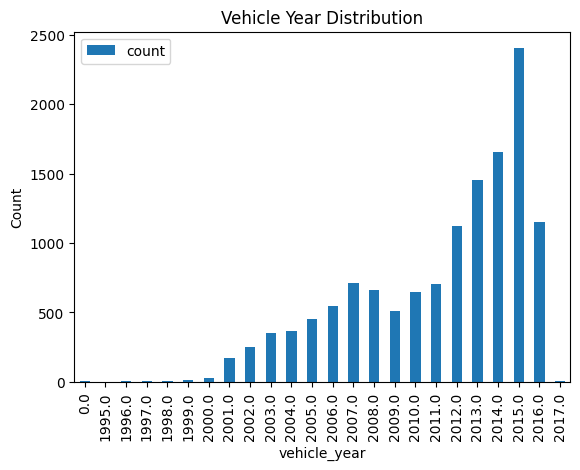

In [98]:
test_df = pd.DataFrame(df_f['vehicle_year'].value_counts())
test_df = test_df.reset_index()
test_df.sort_values(by='vehicle_year', inplace=True)
test_df.plot(kind='bar', x='vehicle_year', y='count')
plt.title('Vehicle Year Distribution')
plt.ylabel('Count')
plt.subplots_adjust(bottom=0.15)
plt.show()


### Notes: vehicle_year
The value_counts shows that these values look mostly reasonable. There are 4 `0`s and 7 `2017`s which would be a year in the future.  These are wrong but are a negligible number.  It would probably make sense to set these invalid values to null.

~40,000 missing values.  About 80%.

In [56]:
max, min = df['dt_first_completed_date'].max(), df['dt_first_completed_date'].min()
print(min, max)

2016-01-04 00:00:00 2016-02-29 00:00:00


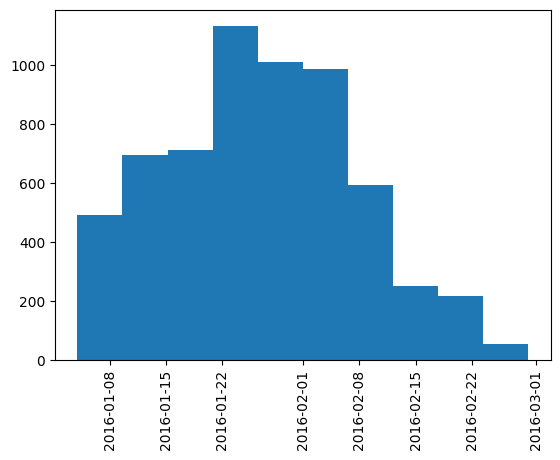

In [59]:
plt.hist(x=df['dt_first_completed_date'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [57]:
df_f['did_become_driver'] = False
df_f.loc[~df_f['first_completed_date'].isna(), 'did_become_driver'] = True

### Notes: first_completed_date
From this field, we will make our target variable called `did_become_driver`.  If they have a value in this field, they did become an Uber driver.

We can see from the min/max and the chart above that the values for this field look reasonable.


## Overall Notes on EDA

I've now looked through each field and assessed the faithfulness of the data in that field relative to what that field purports to represent. In the process, I have also transformed the data in the following ways:
- I translated the date fields from text format to datetime
- I have engineered 2 new fields from vehicle_added_date and bgc_date.

With regard to the missing data, for many of the fields(e.g. 'bgc_date' and the vehicle information fields), the missing data is not a reflection of poor data.  It means that the individual never completed these actions.  Therefore, we won't handle this data as normal missing data by "imputing" a value or removing the rows.

Overall results on the 5 properties
- Structure:  This is generally correct, with the two caveats listed below regarding the data dictionary. Csv import worked correctly and filenames worked.  
  - One column name(city_id -> city_name) is different from the data dictionary
  - Date formats are provided incorrectly in the data dictionary. 
- Scope: The data is for each day of january 2016(except jan 31).  And, it is essentially regularly distributed across these days.  Therefore, the time of the data is as expected.  The scope of the data is partially based on the time.  There are 54681 rows.  I looked up an estimate for number of people who signed up to drive with uber and did not find anything.  From a look at the city_name field, I see that only 3 cities are represented in the data. Therefore, the scope of the data is only a subset of Uber's overall driver signups, maybe all from those 3 cities.  This "scope" is different than I had understood it to be when first looking at the dataset.  I had thought it was all Uber signups.
- Granularity: The dataset unit of analysis is at the level of the individual who signed up as expected.  This is represented by the fact that the `driver_id` field is unduplicated.  
- Temporality: The data is for all drivers who signed up in the month of Jan 2016.
- Faithfulness: For each field, I've made notes on the faithfulness of the data in the blocks above.  Generally, across each field, the data is valid.  For 'vehicle_make' and 'vehicle_year', I have pointed out a small amount of data(less than .01%) that is probably invalid.



#  Representativeness of the Sample

Is this dataset that looks at individuals who signed up to drive for Uber in Jan 2016 in 3 towns representative of all individuals who sign up to drive for Uber everywhere?  In other words, can the conclusions we make about what factors led this cohort to become drivers be extrapolated to other cohorts of Uber signups?

There are two main factors that will affect how representative this sample is relative to the target population to be extrapolated to.

1. The representativeness of this sample will decrease with time.  If we used this data to predict the behavior of individuals over the rest of 2016, it might be effective.  However, one would expect that this representativeness and thus predictive ability would decrease as we got further away from the time the data was collected.  The market will change(e.g. maybe Lyft becomes more popular), the economy will change, etc.
1. This data will be representative of populations that are similar to the 3 towns from which this sample came from.  It would have less predictive value if used to model behavior in a different region of the country or another country altogether.

You must make the assumptions that: 
1. Time has not changed much between sample and target population
1. The target population is similar to that of the sample

# Sampling Method

The sampling method used here is called "Cohort Sampling"  